# Численное дифференцирование

**Задача 1**   
Методом неопределенных коэффициентов вывести формулу максимального порядка для вычисления 1-й производной $f$ в точке $x$ по точкам $x, x+h, x+2h$. Найти 
1. порядок аппроксимации формулы 
2. главный член ошибки 
3. оптимальный шаг $h$

**Задача 2**  
Используя готовый код для формулы 1-го порядка в следующей ячейке 

Постройте на том же рисунке график убывания ошибки для выведенной в задаче 1 формулы. Убедитесь, что экспериментальный порядок совпадает с теоретическим, и что ошибка убывает быстрее, чем в формуле 1-го порядке. Сравните экспериментальный оптимальный шаг с теоретическим.

**Задача 3**  
Измените конечно-разностную формулу, вычтя главный член ошибки (нужную производную в точке возьмите для конкретной функций).

Постройте график сходимости на том же рисунке, убедитесь, что порядок аппроксимации увеличится.

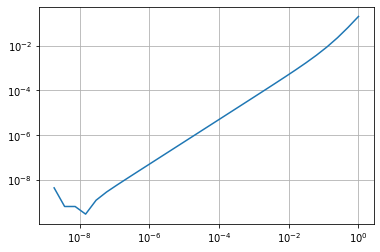

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

f = lambda x : np.sin(x)
df = lambda x : np.cos(x)
x0 = 0.1
n = 30
h = np.zeros(n)
err = np.zeros(n)
for i in range(n):
    h[i] = 2**(-i)
    df_num = (f(x0 + h[i]) - f(x0)) / h[i]
    err[i] = np.abs(df_num - df(x0))
fig, ax = plt.subplots()
ax.loglog(h,err)
ax.grid(True)

**Задача 4**  (2 балла)  
Для равномерной сетки $x_1, \ldots, x_n$ составьте матрицу $D$ размера $n\times n$ такую, чтобы 
$$D f = d$$
где $f = [f(x_1), \ldots, f(x_n)]$ , а вектор $d \approx [f'(x_1), \ldots, f'(x_n)]$. Для этого используйте для производных в крайних узлах $x_1$ и $x_n$ односторонние формулы из задачи 1, а для внутренних узлов симметричную формулу 
$$f'(x) = \frac{f(x+h) - f(x-h)}{2h} + O(h^2)$$
* Запрограммируйте заполнение матрицы, исследуйте на значениях гладкой функции, как убывает $\infty$-норма ошибки $\vec{d} - \vec{f'}$.
* Убедитесь, что $D^2 f$ есть вектор приближенных значений 2-й производной в узлах. Какой порядок аппроксимации в этом случае? Объясните, почему.

# Численное интегрирование
$$
I = \int_{a}^{b} f(x) \, dx \approx S(f) = \sum_{k=1}^n d_k f(x_k)
$$

**Задача 1**  
Получите веса квадратурной формулы Симпсона - интерполяционной формулы, которая получается при замене $f$ многочленом 2-й степени по точкам $a, (a+b)/2, b$. Для упрощения выкладок можно взять отрезок $[-1, 1]$

**Задача 2**  
Получите оценку ошибки для формулы Симпсона, используя разложение $f$ в ряд Тейлора относительно середины отрезка $(b+a)/2$

**Задача 3** (2 балла)
* Используя код в следующей ячейке, постройте такой же график для составной формулы Симпсона (когда на каждом маленьком отрезке используется обычная формула Симпсона). Убедитесь, что порядок совпадает с теоретическим.  
* Запрограммируйте оценку ошибки по правилу Рунге и справните с точным значением ошибки.

1.212363542890671e-12


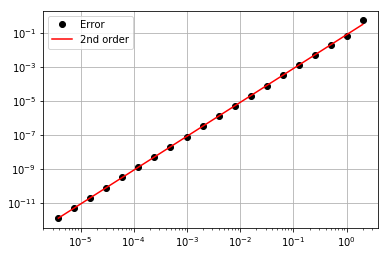

In [4]:
f = lambda x: 1/(1 + x**2)
I_ex = np.pi/2 
N = 20
err = np.zeros(N)
h = 2/2**np.arange(N)
n = 2**np.arange(N)
for k in range(N):
    x = np.linspace(-1, 1, n[k] + 1)
    fval = f(x)
    # Измените эту формулу:
    I_tr = h[k] * (np.sum(fval) - 0.5*(fval[0] + fval[-1]))
    err[k] = np.abs(I_tr - I_ex)
fig, ax = plt.subplots()
plt.loglog(h, err, 'ko', label = 'Error')
plt.loglog(h, err[-1]*(h/h[-1])**2, 'r-', label = '2nd order')
plt.legend()
plt.grid(True)
print(err[-1])

## Квадратуры Гаусса

**Задача 4**  (1 балл)  
Докажите, что все веса в квадратурной формуле Гаусса положительны.

**Задача 5**  (1 балл)  
Найдите узлы и веса квадратурной формулы Гаусса для числа узлов $n=3$. Напишите программу для вычисления интеграла по этой формуле.